# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

sns.set()

In [2]:
confirmed_data_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_data_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_data_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
confirmed_df = pd.read_csv(confirmed_data_path)
deaths_df = pd.read_csv(deaths_data_path)
recovered_df = pd.read_csv(recovered_data_path)

# Get to know the data:

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [5]:
confirmed_df.shape

(253, 72)

In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [7]:
deaths_df.shape

(253, 72)

In [8]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,2,2,2,10,17,17,31,31,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,32,65,65,24,65,29,29,31,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
recovered_df.shape

(239, 72)

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

# Data Preprocessing:

In [10]:
print(f'Confirmed dataframe shape: {confirmed_df.shape}')
print(f'Deaths dataframe shape: {deaths_df.shape}')
print(f'Recovered dataframe shape: {recovered_df.shape}')

Confirmed dataframe shape: (253, 72)
Deaths dataframe shape: (253, 72)
Recovered dataframe shape: (239, 72)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

@**Qusai** what do you think? (BTW, no way to mention to other users in jupyter lab, google colab has this feature :|)

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [11]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [12]:
irrelevant_columns = ['Lat', 'Long']

In [13]:
confirmed_df = drop_irrelevant_columns(confirmed_df, irrelevant_columns)
deaths_df = drop_irrelevant_columns(deaths_df, irrelevant_columns)
recovered_df = drop_irrelevant_columns(recovered_df, irrelevant_columns)

In [14]:
confirmed_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [15]:
deaths_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [16]:
recovered_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
1,NaN,Albania,0,0,0,0,0,0,0,0,...,0,2,2,2,10,17,17,31,31,33
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,32,32,65,65,24,65,29,29,31,31
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `City` and `Country` respectively.

In [17]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [18]:
columns_mapping = {
    'Province/State': 'City',
    'Country/Region': 'Country'
}

In [19]:
confirmed_df = rename_columns(confirmed_df, columns_mapping)
deaths_df = rename_columns(deaths_df, columns_mapping)
recovered_df = rename_columns(recovered_df, columns_mapping)

In [20]:
confirmed_df.head()

,City,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [21]:
deaths_df.head()

,City,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [22]:
recovered_df.head()

,City,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
1,NaN,Albania,0,0,0,0,0,0,0,0,...,0,2,2,2,10,17,17,31,31,33
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,32,32,65,65,24,65,29,29,31,31
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3 - Drop `City` column
most records doesn't have `City` value, so it's better to drop it.

In [23]:
confirmed_df = drop_irrelevant_columns(confirmed_df, 'City')
deaths_df = drop_irrelevant_columns(deaths_df, 'City')
recovered_df = drop_irrelevant_columns(recovered_df, 'City')

In [24]:
confirmed_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,Albania,0,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,Algeria,0,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,Angola,0,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [25]:
deaths_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,Algeria,0,0,0,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [26]:
recovered_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
1,Albania,0,0,0,0,0,0,0,0,0,...,0,2,2,2,10,17,17,31,31,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,32,32,65,65,24,65,29,29,31,31
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4 - Aggregate data by countries:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

In [28]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [29]:
confirmed_agg_df = apply_aggregation(confirmed_df, by_column='Country')
deaths_agg_df = apply_aggregation(deaths_df, by_column='Country')
recovered_agg_df = apply_aggregation(recovered_df, by_column='Country')

In [30]:
confirmed_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,Albania,0,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,Algeria,0,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,Angola,0,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [31]:
deaths_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,Algeria,0,0,0,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [32]:
recovered_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
1,Albania,0,0,0,0,0,0,0,0,0,...,0,2,2,2,10,17,17,31,31,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,32,32,65,65,24,65,29,29,31,31
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
deaths_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,Algeria,0,0,0,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## 5 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to br rows (for easier manipulation)

In [43]:
date_columns = [date for date in confirmed_agg_df.columns if date != 'Country']

In [47]:
def construct_date_df(df, column_name, value_column_name):
    date_df = pd.DataFrame(data={
        'date': column_name,
        'Country': df['Country'],
        value_column_name: df[column_name]
    })
    return date_df

In [48]:
confirmed_date_frames = [construct_date_df(confirmed_agg_df, date_column, 'confirmed') for date_column in date_columns]
deaths_date_frames = [construct_date_df(deaths_agg_df, date_column, 'deaths') for date_column in date_columns]
recovered_date_frames = [construct_date_df(recovered_agg_df, date_column, 'recovered') for date_column in date_columns]

In [49]:
confirmed_time_series = pd.concat(confirmed_date_frames)
deaths_time_series = pd.concat(deaths_date_frames)
recovered_time_series = pd.concat(recovered_date_frames)

In [53]:
confirmed_time_series.head()

,date,Country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [54]:
deaths_time_series.head()

,date,Country,deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [55]:
recovered_time_series.head()

,date,Country,recovered
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


in the rest of the notebook, we will focus on the following three dataframes:
- `confirmed_time_series`: time series of the confirmed cases.
- `deaths_time_series`: time series of the deaths.
- `recovered_time_series`: time series of the recovered cases.

A *time series* data shows the change in a *statiscal variable* according to *time*.<br>
Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 6 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [60]:
last_day = deaths_time_series['date'].values[-1]

In [84]:
most_affected_countries = deaths_time_series[deaths_time_series['date'] == last_day]\
                                            .sort_values(by='deaths', ascending=False)\
                                            [:10]

In [85]:
most_affected_countries

,date,Country,deaths
82,3/29/20,Italy,10779
150,3/29/20,Spain,6803
34,3/29/20,China,3304
78,3/29/20,Iran,2640
59,3/29/20,France,2611
165,3/29/20,US,2467
169,3/29/20,United Kingdom,1231
117,3/29/20,Netherlands,772
63,3/29/20,Germany,533
16,3/29/20,Belgium,431


In [73]:
most_affected_countries_names = most_affected_countries['Country'].values

Create time series for most affected countries:

In [75]:
most_deaths_time_series = deaths_time_series[deaths_time_series['Country'].isin(most_affected_countries_names)]

In [77]:
most_deaths_time_series.head()

,date,Country,deaths
16,1/22/20,Belgium,0
34,1/22/20,China,17
59,1/22/20,France,0
63,1/22/20,Germany,0
78,1/22/20,Iran,0


In [78]:
most_confirmed_time_series = confirmed_time_series[confirmed_time_series['Country'].isin(most_affected_countries_names)]

In [79]:
most_confirmed_time_series.head()

,date,Country,confirmed
16,1/22/20,Belgium,0
34,1/22/20,China,548
59,1/22/20,France,0
63,1/22/20,Germany,0
78,1/22/20,Iran,0


In [80]:
most_recovered_time_series = recovered_time_series[recovered_time_series['Country'].isin(most_affected_countries_names)]

In [81]:
most_recovered_time_series.head()

,date,Country,recovered
16,1/22/20,Belgium,0
34,1/22/20,China,28
59,1/22/20,France,0
63,1/22/20,Germany,0
78,1/22/20,Iran,0


# Data Visualization:

## Line Chart:

In [96]:
help(px.line)

Help on function line in module plotly.express._chart_types:

line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_discrete_sequence=None, color_discrete_map={}, line_dash_sequence=None, line_dash_map={}, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a 2D line plot, each row of `data_frame` is represented as vertex of
        a polyline mark in 2D space.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
   

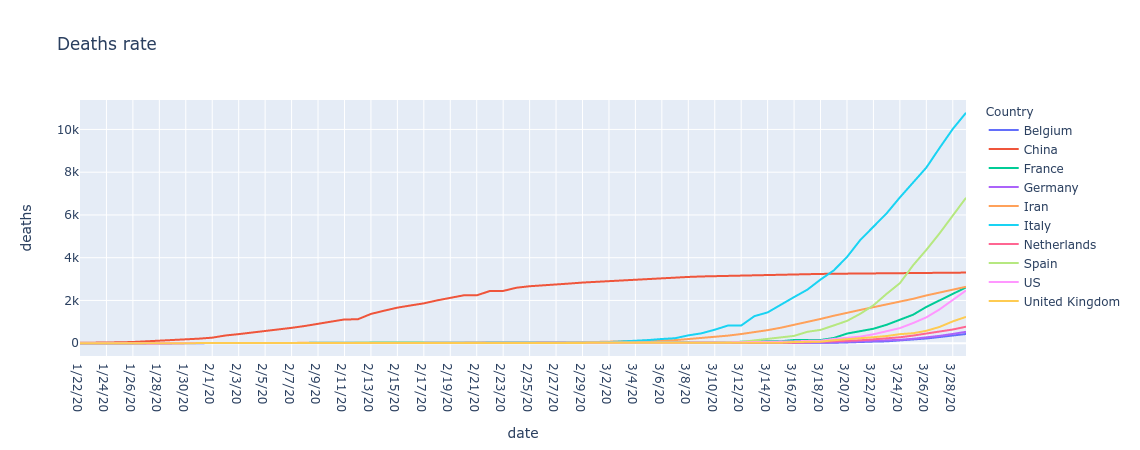

In [100]:
fig = px.line(data_frame=most_deaths_time_series, x='date', y='deaths', color='Country', line_group='Country', title='Deaths rate')
fig.show()

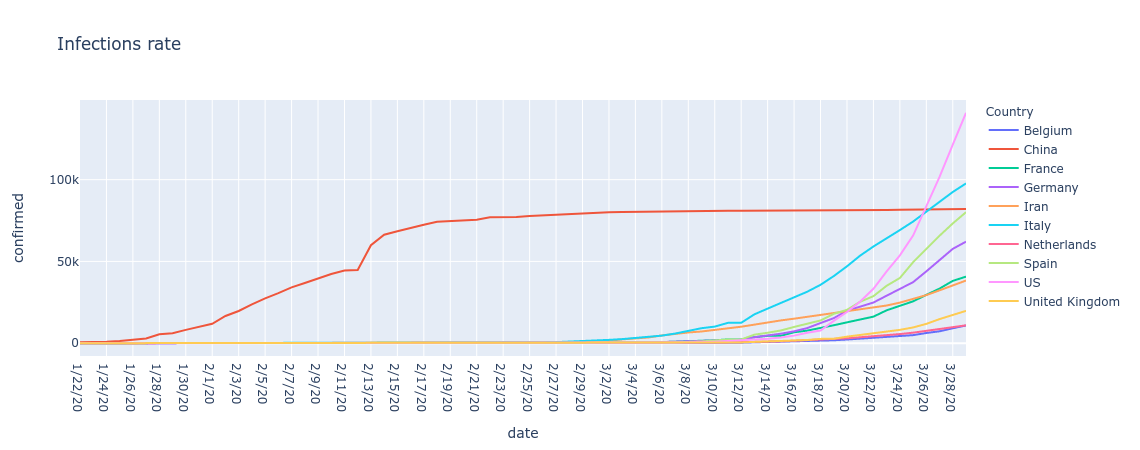

In [87]:
fig = px.line(data_frame=most_confirmed_time_series, x='date', y='confirmed', color='Country', line_group='Country', title='Infections rate')
fig.show()

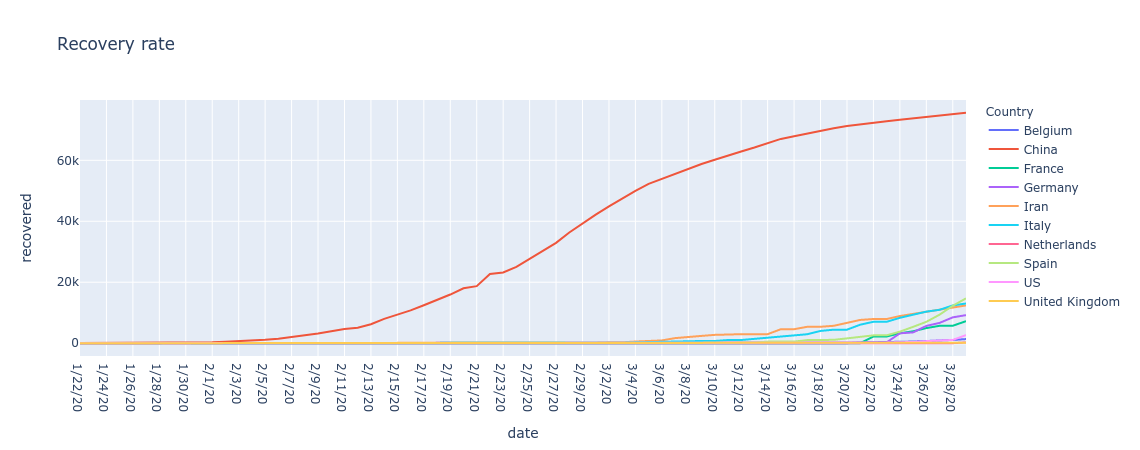

In [88]:
fig = px.line(data_frame=most_recovered_time_series, x='date', y='recovered', color='Country', line_group='Country', title='Recovery rate')
fig.show()

`TODO`:
- investigate the date of the lockdown applied by each country, and study how it affected the growth of cases (in general)
- try to model the grow of countries by *Mathematical functions*, China for example is like the `sigmoid` function, while other counter countries like Italy, Spain, ... are more like `exponential` function (good resource for this: [Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths](https://www.youtube.com/watch?v=mCa0JXEwDEk))

## Choropleth Map:

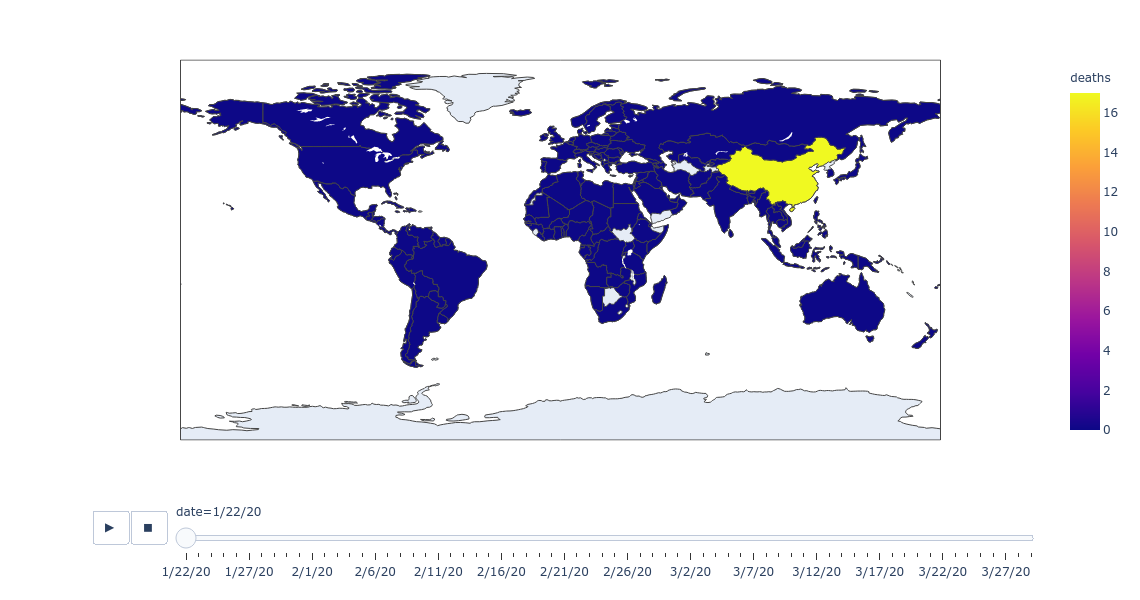

In [91]:
fig = px.choropleth(data_frame=deaths_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths', animation_frame='date',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    width=1000, height=600)
fig.show()

## Bubble Map:

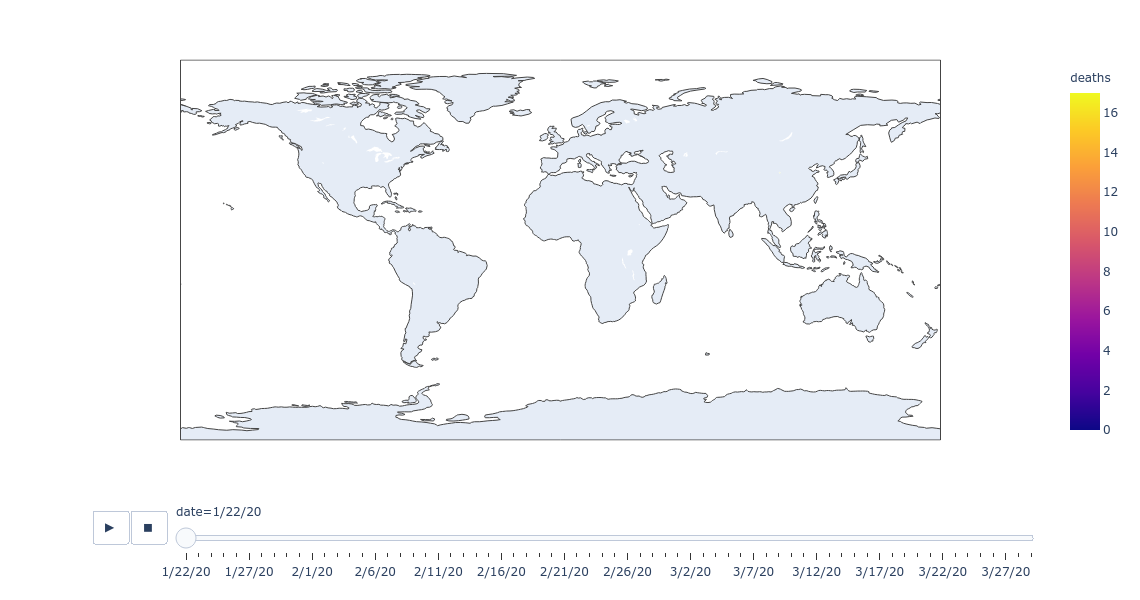

In [95]:
fig = px.scatter_geo(data_frame=deaths_time_series, locations='Country',
                     locationmode='country names', color='deaths',
                     hover_name='deaths', animation_frame='date', size='deaths',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     width=1000, height=600)
fig.show()